<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/TimeSeries6_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pmdarima
from pmdarima import auto_arima

     |████████████████████████████████| 921kB 5.0MB/s 
     |████████████████████████████████| 24.8MB 44.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
%cd drive/'My Drive'/amex/USConsumption

/content/drive/My Drive/amex/USConsumption


In [0]:
df=pd.read_csv('M2.csv',index_col=0,parse_dates=True)
# df.index.freq='MS'
sp=pd.read_csv('PCE.csv',index_col=0,parse_dates=True)
# sp.index.freq='MS'

In [0]:
df1=df.loc['1994-12-31':]
df1.rename(columns={'M2':'Money'},inplace=True)
df1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Money
DATE,
1995-01-02,3480.3
1995-01-09,3489.8
1995-01-16,3493.9
1995-01-23,3495.2
1995-01-30,3494.1


In [0]:
sp.head(2)

,PCE
DATE,
1959-01-01,306.1
1959-02-01,309.6


In [0]:
sp1=sp.loc['1994-12-31':]
sp1.rename(columns={'PCE':'Spending'},inplace=True)
sp1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Spending
DATE,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [0]:
# df1.groupby(['DATE']).mean()

In [0]:
df1=df1.resample('M').first()

In [0]:
sp1=sp1.resample('M').first()

In [0]:
fdf=df1.join(sp1)
fdf.head()

,Money,Spending
DATE,,
1995-01-31,3480.3,4851.2
1995-02-28,3492.4,4850.8
1995-03-31,3486.6,4885.4
1995-04-30,3485.1,4890.2
1995-05-31,3510.7,4933.1


In [0]:
fdf.isna().sum()

Money       0
Spending    1
dtype: int64

In [0]:
fdf.shape

(294, 2)

In [0]:
fdf=fdf.dropna()

In [0]:
fdf.shape

(293, 2)

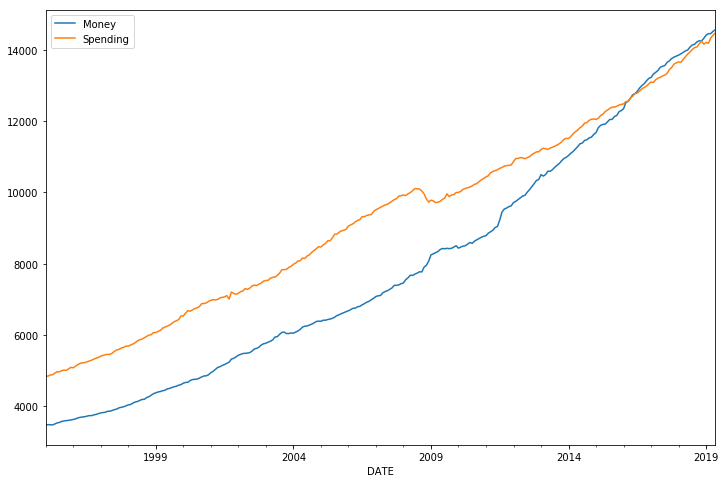

In [0]:
fdf.plot(figsize=(12,8))

In [0]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
  """Pass in a time series and an optional title, returns an adf report"""
  print(f'Augmented Dickey Fuller Test:{title}')
  result=adfuller(series.dropna(),autolag='AIC') # dropna handles the differenced data
  
  labels=['ADF Test Statistics','p-value','# Lags used','# Observations']
  out=pd.Series(result[0:4],index=labels)
  
  for k , v in result[4].items():
    out[f'critical value ({k})']=v
    
  print(out.to_string()) # to_string() removes the line "dtype:float64"
  
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
  else:
    print("Weak evidence against the null hypothesis")
    print("Fail the null hypothesis")
    print("Data has a unit root and is non-stationary")

In [0]:
fdf.columns

Index(['Money', 'Spending'], dtype='object')

In [0]:
adf_test(fdf['Money'])
adf_test(fdf['Spending'])

Augmented Dickey Fuller Test:
ADF Test Statistics       3.898890
p-value                   1.000000
# Lags used               3.000000
# Observations          289.000000
critical value (1%)      -3.453182
critical value (5%)      -2.871593
critical value (10%)     -2.572127
Weak evidence against the null hypothesis
Fail the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey Fuller Test:
ADF Test Statistics       1.913232
p-value                   0.998549
# Lags used               2.000000
# Observations          290.000000
critical value (1%)      -3.453102
critical value (5%)      -2.871559
critical value (10%)     -2.572108
Weak evidence against the null hypothesis
Fail the null hypothesis
Data has a unit root and is non-stationary


In [0]:
df_transformed=fdf.diff()
df_transformed.head(3)

,Money,Spending
DATE,,
1995-01-31,NaN,NaN
1995-02-28,12.1,-0.4
1995-03-31,-5.8,34.6


In [0]:
adf_test(df_transformed['Money'])
adf_test(df_transformed['Spending'])

Augmented Dickey Fuller Test:
ADF Test Statistics    -6.232368e+00
p-value                 4.917983e-08
# Lags used             2.000000e+00
# Observations          2.890000e+02
critical value (1%)    -3.453182e+00
critical value (5%)    -2.871593e+00
critical value (10%)   -2.572127e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey Fuller Test:
ADF Test Statistics    -1.010762e+01
p-value                 1.020036e-17
# Lags used             1.000000e+00
# Observations          2.900000e+02
critical value (1%)    -3.453102e+00
critical value (5%)    -2.871559e+00
critical value (10%)   -2.572108e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [0]:
df_transformed=df_transformed.dropna()
df_transformed.head()

,Money,Spending
DATE,,
1995-02-28,12.1,-0.4
1995-03-31,-5.8,34.6
1995-04-30,-1.5,4.8
1995-05-31,25.6,42.9
1995-06-30,30.7,44.4


In [0]:
df_transformed.shape

(292, 2)

In [0]:
#No. of observations
nobs=12

In [0]:
train=df_transformed[:-nobs]
test=df_transformed[-nobs:]

In [0]:
len(test)

12

# Choose the Order of VAR  using grid search . since autoarima isnt there for VAR, so lets go with for loop

In [0]:
model=VAR(train)

for p in [1,2,3,4,5,6,7,8,9]:
  results=model.fit(p)
  print(f'ORDER{p}')
  print(f'AIC:{results.aic}')
  print('\n')

ORDER1
AIC:14.027728895955347


ORDER2
AIC:13.973283405250198


ORDER3
AIC:13.941266594988784


ORDER4
AIC:13.925695815805781


ORDER5
AIC:13.948748023208173


ORDER6
AIC:13.941450758255497


ORDER7
AIC:13.965770393786592


ORDER8
AIC:13.977555750020674


ORDER9
AIC:13.947027803392572




In [0]:
results=model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Jul, 2019
Time:                     14:05:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1618
Nobs:                     276.000    HQIC:                   14.0204
Log likelihood:          -2687.00    FPE:                1.11654e+06
AIC:                      13.9257    Det(Omega_mle):     1.04713e+06
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              22.578347         4.916329            4.593           0.000
L1.Money            0.163339         0.060099            2.718           0.007
L1.Spending        -0.179190         0.053340           -3.359      

In [0]:
train.values.shape

(280, 2)

In [0]:
lagged_values=train.values[-5:]
z=results.forecast(y=lagged_values,steps=12)


In [0]:
test

,Money,Spending
DATE,,
2018-06-30,82.6,60.4
2018-07-31,57.3,67.4
2018-08-31,18.5,54.2
2018-09-30,68.1,17.8
2018-10-31,30.4,88.5
2018-11-30,-10.1,70.0
2018-12-31,80.1,-81.5
2019-01-31,86.3,47.7
2019-02-28,41.6,-23.4


In [0]:
idx=pd.date_range('2018-06-30',periods=12,freq='M')
idx

DatetimeIndex(['2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [0]:
df_forecast=pd.DataFrame(data=z,index=idx,columns=['Money_1d','Spend_1d'])

In [0]:
df_forecast

,Money_1d,Spend_1d
2018-06-30,12.468868,39.827713
2018-07-31,33.754963,46.416488
2018-08-31,32.056672,42.158082
2018-09-30,35.058840,38.644383
2018-10-31,34.963409,35.299066
2018-11-30,36.667016,35.491669
2018-12-31,37.504582,34.257464
2019-01-31,37.488159,33.782499
2019-02-28,37.636313,33.304701
2019-03-31,38.042449,33.162653
